useful commands:
df.head() #see top 5 rows
df.tail() # see bottom 5 rows
df.sort_values(by='casual') # sort the table by a column
df['season'] # selects a single column
df[0:3] # slices rows 0 to 3
df['20130102':'20130104'] # slices rows in the given range
count_df = df.loc[:,['dteday','cnt']] # selects columns dteday and cnt

In [39]:
from math import *
import numpy
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import statsmodels.formula.api as sm
%pylab inline
%matplotlib inline
pylab.rcParams['figure.figsize'] = (15, 6)

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['sinh', 'trunc', 'tan', 'gamma', 'cosh', 'radians', 'sin', 'fmod', 'expm1', 'ldexp', 'exp', 'frexp', 'ceil', 'copysign', 'isnan', 'cos', 'degrees', 'pi', 'tanh', 'fabs', 'sqrt', 'hypot', 'log', 'log10', 'e', 'log1p', 'floor', 'modf', 'isinf']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [40]:
df = pd.read_csv("/Users/hannahhagen/Documents/Git/data-analysis-bike-share/Question1 Data Set/day.csv") #Reading the dataset in a dataframe using Pandas
# df.describe() #get summary of numerical variables
df['holiday'].value_counts()
dteday = df.columns[1]

In [41]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,1/1/11,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,1/2/11,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,1/3/11,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,1/4/11,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,1/5/11,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


0    1/1/11
1    1/2/11
2    1/3/11
3    1/4/11
4    1/5/11
Name: dteday, dtype: object


(0, 9000)

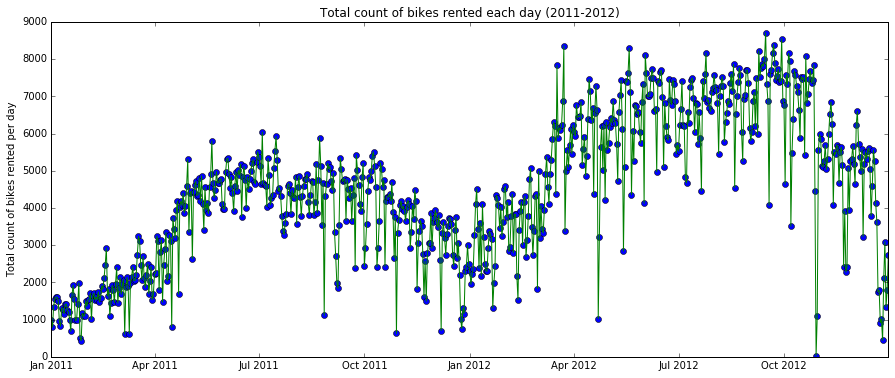

In [42]:
# create a time series (line graph) of total count (cnt) using dteday
count_df = df['cnt']
date_df = df['dteday']
print(date_df.head())
pd.to_datetime(date_df,yearfirst=True)
# date_df = matplotlib.dates.date2num(date_df)
plt.plot_date(date_df,count_df)
plt.plot(date_df,count_df)
plt.ylabel('Total count of bikes rented per day')
plt.title('Total count of bikes rented each day (2011-2012)')
plt.ylim(0, 9000)

(0, 9000)

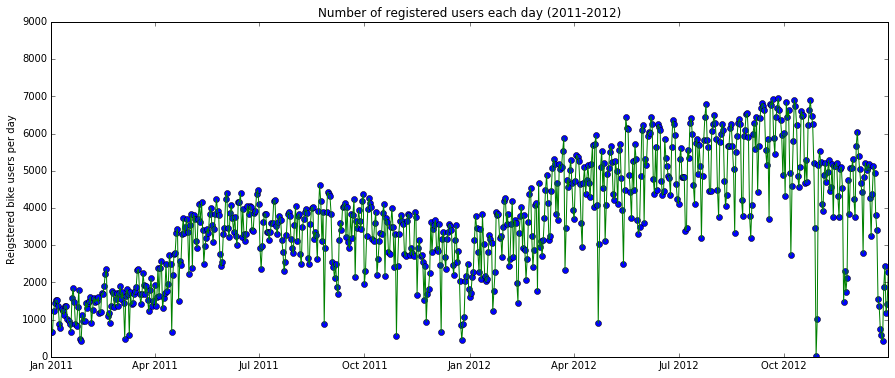

In [43]:
# create a time series (line graph) of registered count.
plt.plot_date(date_df,df['registered'])
plt.plot(date_df,df['registered'])
plt.ylabel('Reigstered bike users per day')
plt.title('Number of registered users each day (2011-2012)')
plt.ylim(0, 9000)

(0, 9000)

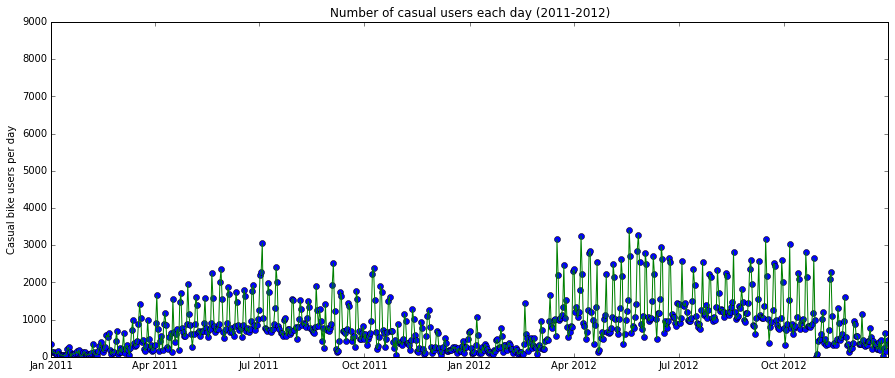

In [44]:
# create a time series (line graph) of casual count.
plt.plot_date(date_df,df['casual'])
plt.plot(date_df,df['casual'])
plt.ylabel('Casual bike users per day')
plt.title('Number of casual users each day (2011-2012)')
plt.ylim(0, 9000)

(0, 9000)

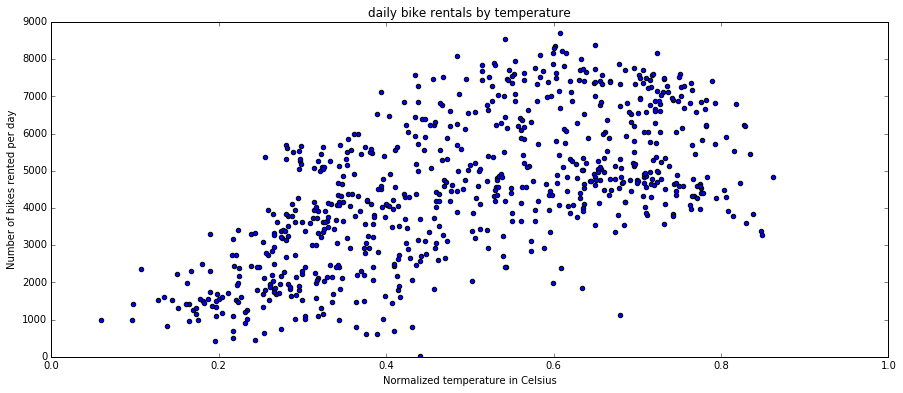

In [45]:
# df['temp'].hist(bins=100)
temp_df = df['temp']
plt.scatter(temp_df,count_df)
plt.ylabel('Number of bikes rented per day')
plt.xlabel('Normalized temperature in Celsius')
plt.title('daily bike rentals by temperature')
plt.ylim(0, 9000)

(0, 9000)

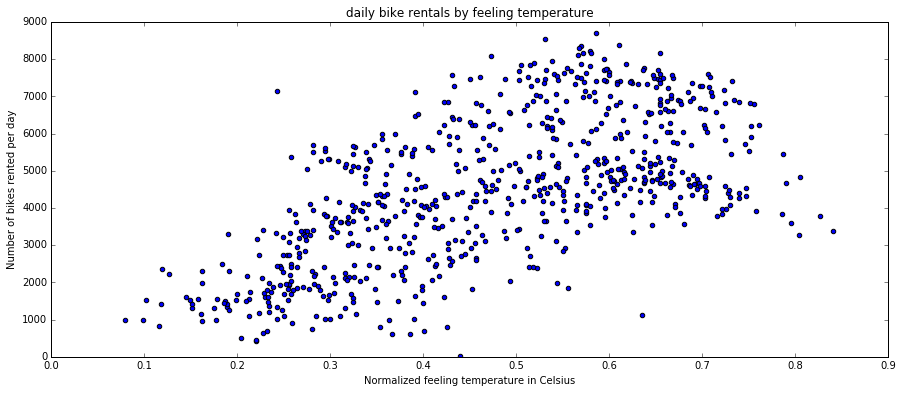

In [46]:
temp_df = df['atemp']
plt.scatter(temp_df,count_df)
plt.ylabel('Number of bikes rented per day')
plt.xlabel('Normalized feeling temperature in Celsius')
plt.title('daily bike rentals by feeling temperature')
plt.ylim(0, 9000)

workingday       
0           count     231.000000
            mean     4330.168831
            std      2052.141245
            min       605.000000
            25%      2710.500000
            50%      4459.000000
            75%      5907.500000
            max      8714.000000
1           count     500.000000
            mean     4584.820000
            std      1878.415583
            min        22.000000
            25%      3344.250000
            50%      4582.000000
            75%      5987.500000
            max      8362.000000
Name: cnt, dtype: float64
('mean count for not working day: ', 4330.1688311688313)
('mean count for working day: ', 4584.8199999999997)
('std of count on non-working days ', 2052.1412448375504)
('std of count on working days ', 1878.4155828260175)


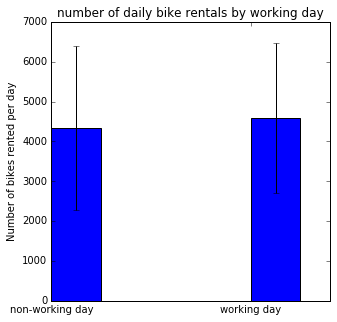

In [47]:
# manually calculate the mean and standard deviation for count based on whether it is a working day.
# workingday_df = df['workingday']
# workingday_1_df = df[workingday_df > 0]
# workingday_0_df = df[workingday_df == 0]
# cnt_avg_workingday = np.mean(workingday_1_df['cnt'])
# cnt_avg_notworkingday = np.mean(workingday_0_df['cnt'])
# workingday_df = [cnt_avg_workingday,cnt_avg_notworkingday]

# use panadas groupby method to calc mean and standard dev.
workingday = df.groupby(['workingday'])
workingday_stats = workingday.describe()
print(workingday_stats.cnt)
mean_cnt_workingday = [workingday_stats.cnt[0]['mean'],workingday_stats.cnt[1]['mean']]
std_cnt_workingday = [workingday_stats.cnt[0]['std'],workingday_stats.cnt[1]['std']]
print("mean count for not working day: ",workingday_stats.cnt[0]['mean'])
print("mean count for working day: ",workingday_stats.cnt[1]['mean'])
print('std of count on non-working days ',std_cnt_workingday[0])
print('std of count on working days ',std_cnt_workingday[1])


x = [0,1]
plt.figure(figsize=(5, 5))
plt.bar(left=x,height=mean_cnt_workingday,width=0.25,yerr=std_cnt_workingday,ecolor = 'black',tick_label=['non-working day','working day'])
plt.ylabel('Number of bikes rented per day')
plt.title('number of daily bike rentals by working day')
# here we see that bike share usage is actually higher on working days. (against my expectation). 
# Slightly larger std of count on non-working days suggests that users are more varied in their behavior. 

('mean count for weekdays: ', [4228.8285714285712, 4338.1238095238095, 4510.6634615384619, 4548.5384615384619, 4667.2596153846152, 4690.2884615384619, 4550.5428571428574])
('std of count for weekdays: ', [1872.4966286153426, 1793.0740133123668, 1826.9116420282053, 2038.0958842649686, 1939.4333172707065, 1874.6248695189579, 2196.693008507646])
4504.34883721
max_variability is 10.9122392245 %


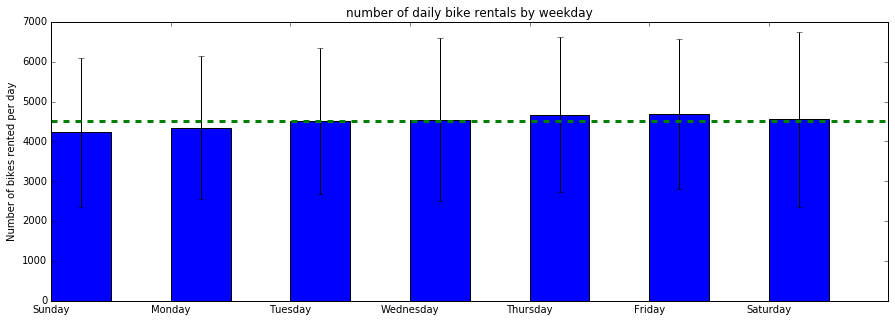

In [64]:
# investigate effect of weekday on bike rental count
weekday = df.groupby(['weekday'])
weekday_stats = weekday.describe()
mean_cnt_weekday = []
std_cnt_weekday = []
i = 0
while i<7:
    mean_cnt_weekday.append(weekday_stats.cnt[i]['mean'])
    std_cnt_weekday.append(weekday_stats.cnt[i]['std'])
    i+=1
print("mean count for weekdays: ",mean_cnt_weekday)
print("std of count for weekdays: ",std_cnt_weekday)

x = [0,1,2,3,4,5,6]
plt.figure(figsize=(15, 5))
tick_label=['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday']
plt.bar(left=x,height=mean_cnt_weekday,width=0.5,yerr=std_cnt_weekday,ecolor = 'black',tick_label=tick_label)
# plot an average total count.
cnt_avg = np.mean(df.cnt)
print(cnt_avg)
plt.axhline(y=cnt_avg, ls='dashed', color='g', linewidth=3)
plt.ylabel('Number of bikes rented per day')
plt.title('number of daily bike rentals by weekday')
# takeaways
# sunday and monday have lowest ridership
# thursday and friday max ridership
# wednesday and saturday have largest variability (unpredictability)
# overall the meximum variation between weekdays is: max_cnt - min_cnt / min_cnt
print 'max_variability is', (max(mean_cnt_weekday)-min(mean_cnt_weekday)) / min(mean_cnt_weekday) * 100, "%"

In [49]:
# result = sm.ols(formula="cnt ~ season + workingday", data=df).fit()
# print result.params
# print result.summary()

In [50]:
from pandas.stats.api import ols
# total count
res = ols(y=df['cnt'], x=df[['season','yr','mnth','holiday','weekday','workingday','weathersit','temp','atemp','hum','windspeed']])

# res = ols(y=df['cnt'], x=df[['dteday','season','yr','mnth','holiday','weekday','workingday','weathersit','temp','atemp','hum','windspeed']])
print"total:",res

# regression is conducted under the assumption that your regression model is correct--
    # i.e., that the dependent variable really is a linear function of the independent variables, 
    # with independent and identically normally distributed errors--the coefficient estimates are 
    # expected to be unbiased and their errors are normally distributed

# note: The larger the standard error of the coefficient estimate, the worse the signal-to-noise ratio--
    # i.e., the less precise the measurement of the coefficient.
    # The standard errors of the coefficients are the (estimated) standard deviations of the errors in estimating them.
    # Now, the standard error of the regression may be considered to measure the overall amount of "noise" in the data, 
    # whereas the standard deviation of X measures the strength of the "signal" in X

# R-squared = fraction of the variation in Y explained by the regression.

# note about t-stat, p-value:
    # In theory, the t-statistic of any one variable may be used to test the hypothesis that the true 
    # value of the coefficient is zero (which is to say, the variable should not be included in the model).
    # In a standard normal distribution, only 5% of the values fall outside the range plus-or-minus 2. 
    # Hence, as a rough rule of thumb, a t-statistic larger than 2 in absolute value would have a 5% or 
    # smaller probability of occurring by chance if the true coefficient were zero. Most stat packages 
    # will compute for you the exact probability of exceeding the observed t-value by chance if the 
    # true coefficient were zero. This is labeled as the "P-value" or "significance level" in the 
    # table of model coefficients.  A low value for this probability indicates that the coefficient is 
    # significantly different from zero, i.e., it seems to contribute something to the model.

# http://people.duke.edu/~rnau/regnotes.htm#confintervals

# registered count
res = ols(y=df['registered'], x=df[['season','yr','mnth','holiday','weekday','workingday','weathersit','temp','atemp','hum','windspeed']])
print "registered:", res

# casual count
res = ols(y=df['casual'], x=df[['season','yr','mnth','holiday','weekday','workingday','weathersit','temp','atemp','hum','windspeed']])
print"casual:",res

/usr/local/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2881: FutureWarning: The pandas.stats.ols module is deprecated and will be removed in a future version. We refer to external packages like statsmodels, see some examples here: http://statsmodels.sourceforge.net/stable/regression.html
  exec(code_obj, self.user_global_ns, self.user_ns)


total: 
-------------------------Summary of Regression Analysis-------------------------

Formula: Y ~ <season> + <yr> + <mnth> + <holiday> + <weekday> + <workingday>
             + <weathersit> + <temp> + <atemp> + <hum> + <windspeed> + <intercept>

Number of Observations:         731
Number of Degrees of Freedom:   12

R-squared:         0.8002
Adj R-squared:     0.7972

Rmse:            872.4164

F-stat (11, 719):   261.8539, p-value:     0.0000

Degrees of Freedom: model 11, resid 719

-----------------------Summary of Estimated Coefficients------------------------
      Variable       Coef    Std Err     t-stat    p-value    CI 2.5%   CI 97.5%
--------------------------------------------------------------------------------
        season   509.7752    54.7571       9.31     0.0000   402.4512   617.0992
            yr  2040.7034    65.1853      31.31     0.0000  1912.9403  2168.4665
          mnth   -38.9796    17.0791      -2.28     0.0228   -72.4545    -5.5046
       holiday  -51

ValueError: invalid literal for float(): 12/31/12

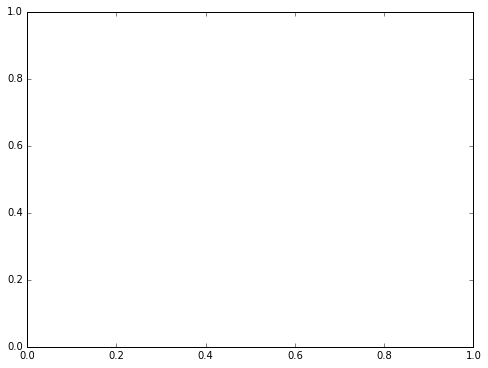

In [51]:
# Draw a plot to compare the true relationship to OLS predictions
from statsmodels.sandbox.regression.predstd import wls_prediction_std

y=df['cnt']
x=df[['season','yr','mnth','holiday','weekday','workingday','weathersit','temp','atemp','hum','windspeed']]

res = sm.OLS(y, x).fit()
prstd, iv_l, iv_u = wls_prediction_std(res)

fig, ax = plt.subplots(figsize=(8,6))
date_df = df['dteday']
pd.to_datetime(date_df,yearfirst=True)
# date_df = matplotlib.dates.date2num(date_df)
ax.plot(date_df, y, 'o', label="data")
# ax.plot(x, y_true, 'b-', label="True")
# ax.plot(x, res.fittedvalues, 'r--.', label="OLS")
# ax.plot(x, iv_u, 'r--')
# ax.plot(x, iv_l, 'r--')
ax.legend(loc='best');

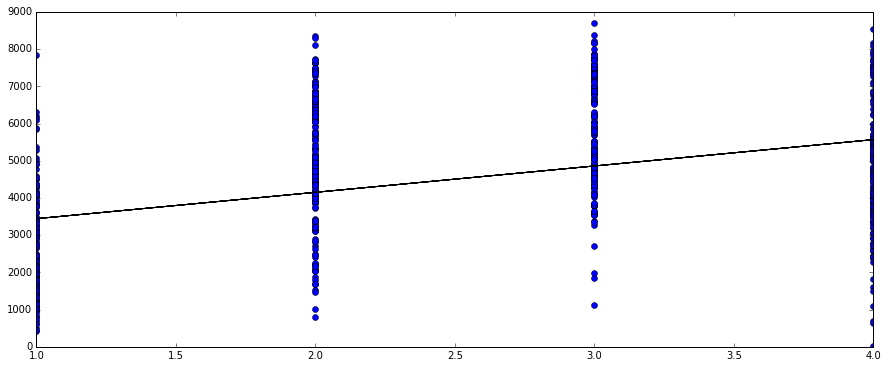

In [52]:
# create linear regressions for each variable
from scipy import stats
# Fit the model
x = df['season']
y = df['cnt']
slope, intercept, r_value, p_value, slope_std_error = stats.linregress(x, y)

# Calculate some additional outputs
predict_y = intercept + slope * x
pred_error = y - predict_y
degrees_of_freedom = len(x) - 2
residual_std_error = np.sqrt(np.sum(pred_error**2) / degrees_of_freedom)

# Plotting
pylab.plot(x, y, 'o')
pylab.plot(x, predict_y, 'k-')
pylab.show()

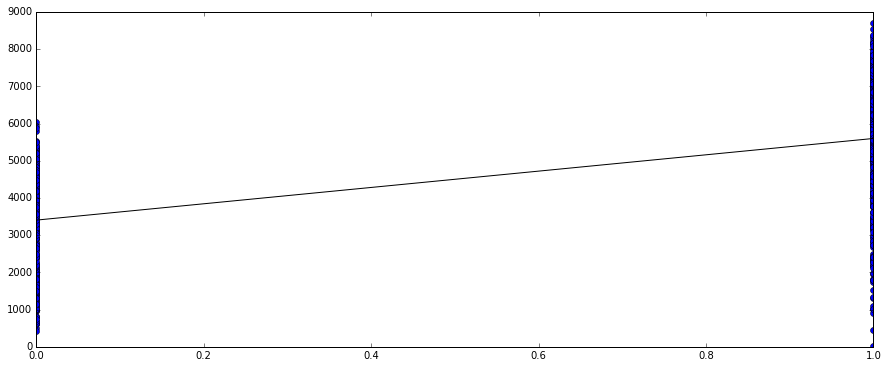

In [53]:
# create linear regressions for each variable
from scipy import stats
# Fit the model
x = df['yr']
y = df['cnt']
slope, intercept, r_value, p_value, slope_std_error = stats.linregress(x, y)

# Calculate some additional outputs
predict_y = intercept + slope * x
pred_error = y - predict_y
degrees_of_freedom = len(x) - 2
residual_std_error = np.sqrt(np.sum(pred_error**2) / degrees_of_freedom)

# Plotting
pylab.plot(x, y, 'o')
pylab.plot(x, predict_y, 'k-')
pylab.show()

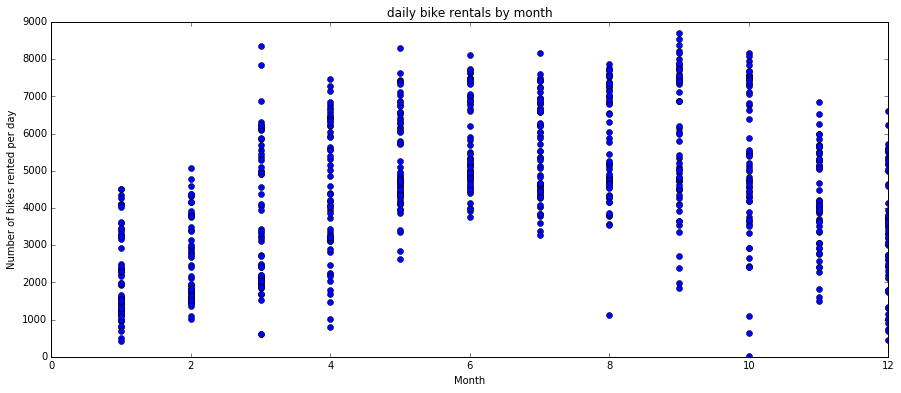

In [54]:
# create linear regressions for each variable
from scipy import stats
# Fit the model
x = df['mnth']
y = df['cnt']
slope, intercept, r_value, p_value, slope_std_error = stats.linregress(x, y)

# Calculate some additional outputs
predict_y = intercept + slope * x
pred_error = y - predict_y
degrees_of_freedom = len(x) - 2
residual_std_error = np.sqrt(np.sum(pred_error**2) / degrees_of_freedom)

# Plotting
pylab.plot(x, y, 'o')
# pylab.plot(x, predict_y, 'k-')
plt.ylabel('Number of bikes rented per day')
plt.xlabel('Month')
plt.title('daily bike rentals by month')
pylab.show()

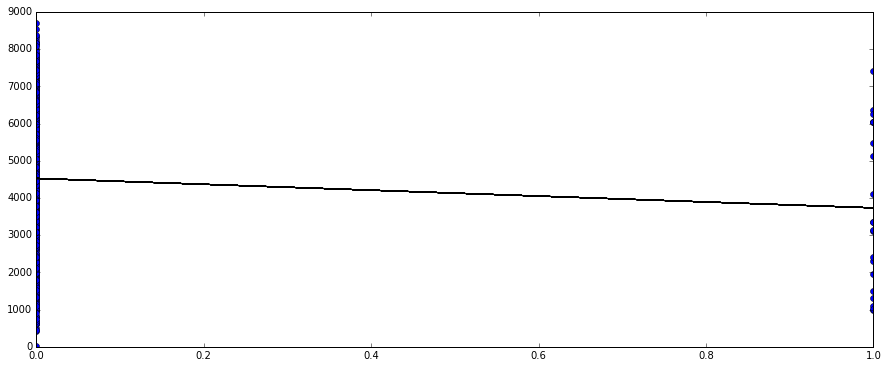

In [55]:
# create linear regressions for each variable
from scipy import stats
# Fit the model
x = df['holiday']
y = df['cnt']
slope, intercept, r_value, p_value, slope_std_error = stats.linregress(x, y)

# Calculate some additional outputs
predict_y = intercept + slope * x
pred_error = y - predict_y
degrees_of_freedom = len(x) - 2
residual_std_error = np.sqrt(np.sum(pred_error**2) / degrees_of_freedom)

# Plotting
pylab.plot(x, y, 'o')
pylab.plot(x, predict_y, 'k-')
pylab.show()

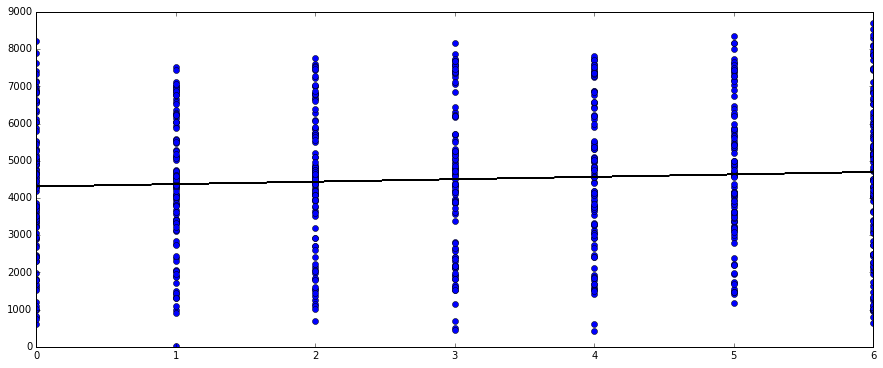

In [56]:
# create linear regressions for each variable
from scipy import stats
# Fit the model
x = df['weekday']
y = df['cnt']
slope, intercept, r_value, p_value, slope_std_error = stats.linregress(x, y)

# Calculate some additional outputs
predict_y = intercept + slope * x
pred_error = y - predict_y
degrees_of_freedom = len(x) - 2
residual_std_error = np.sqrt(np.sum(pred_error**2) / degrees_of_freedom)

# Plotting
pylab.plot(x, y, 'o')
pylab.plot(x, predict_y, 'k-')
pylab.show()

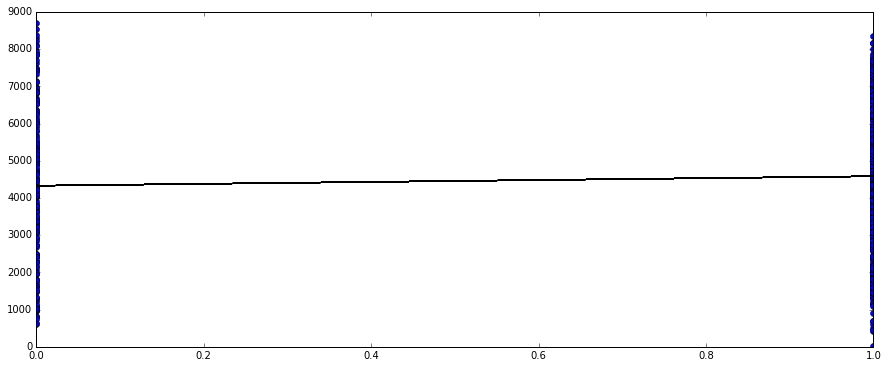

In [57]:
# create linear regressions for each variable
from scipy import stats
# Fit the model
x = df['workingday']
y = df['cnt']
slope, intercept, r_value, p_value, slope_std_error = stats.linregress(x, y)

# Calculate some additional outputs
predict_y = intercept + slope * x
pred_error = y - predict_y
degrees_of_freedom = len(x) - 2
residual_std_error = np.sqrt(np.sum(pred_error**2) / degrees_of_freedom)

# Plotting
pylab.plot(x, y, 'o')
pylab.plot(x, predict_y, 'k-')
pylab.show()

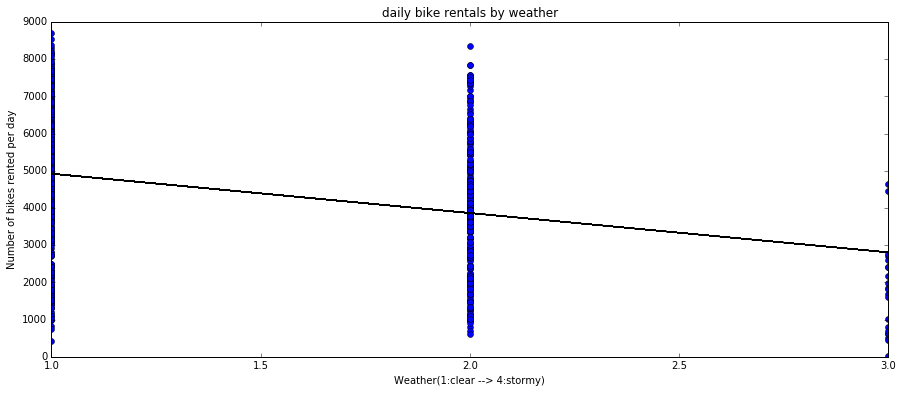

In [58]:
# create linear regressions for each variable
from scipy import stats
# Fit the model
x = df['weathersit']
y = df['cnt']
slope, intercept, r_value, p_value, slope_std_error = stats.linregress(x, y)

# Calculate some additional outputs
predict_y = intercept + slope * x
pred_error = y - predict_y
degrees_of_freedom = len(x) - 2
residual_std_error = np.sqrt(np.sum(pred_error**2) / degrees_of_freedom)

# Plotting
pylab.plot(x, y, 'o')
pylab.plot(x, predict_y, 'k-')
plt.ylabel('Number of bikes rented per day')
plt.xlabel('Weather(1:clear --> 4:stormy)')
plt.title('daily bike rentals by weather')
plt.ylim(0, 9000)
pylab.show()

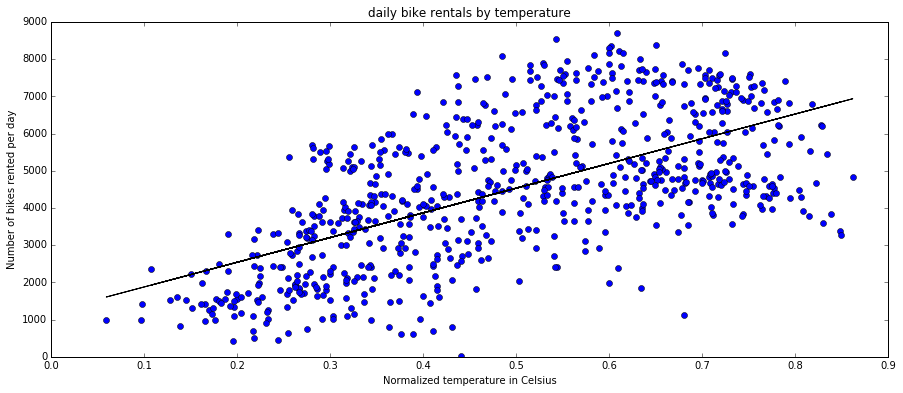

In [59]:
# create linear regressions for each variable
from scipy import stats
# Fit the model
x = df['temp']
y = df['cnt']
slope, intercept, r_value, p_value, slope_std_error = stats.linregress(x, y)

# Calculate some additional outputs
predict_y = intercept + slope * x
pred_error = y - predict_y
degrees_of_freedom = len(x) - 2
residual_std_error = np.sqrt(np.sum(pred_error**2) / degrees_of_freedom)

# Plotting
plt.plot(x, y, 'o')
plt.plot(x, predict_y, 'k-')
plt.ylabel('Number of bikes rented per day')
plt.xlabel('Normalized temperature in Celsius')
plt.title('daily bike rentals by temperature')
plt.ylim(0, 9000)
plt.show()


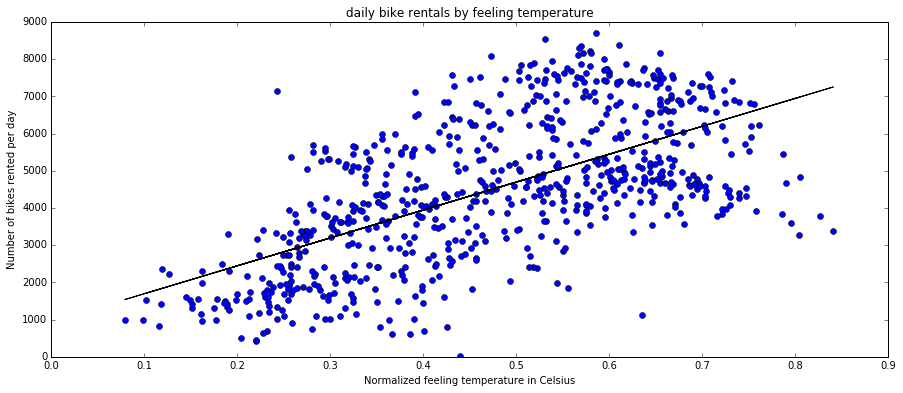

In [60]:
# create linear regressions for each variable
from scipy import stats
# Fit the model
x = df['atemp']
y = df['cnt']
slope, intercept, r_value, p_value, slope_std_error = stats.linregress(x, y)

# Calculate some additional outputs
predict_y = intercept + slope * x
pred_error = y - predict_y
degrees_of_freedom = len(x) - 2
residual_std_error = np.sqrt(np.sum(pred_error**2) / degrees_of_freedom)

# Plotting
plt.plot(x, y, 'o')
pylab.plot(x, predict_y, 'k-')
plt.ylabel('Number of bikes rented per day')
plt.xlabel('Normalized feeling temperature in Celsius')
plt.title('daily bike rentals by feeling temperature')
plt.ylim(0, 9000)
pylab.show()
# plt.title("feeling tem")


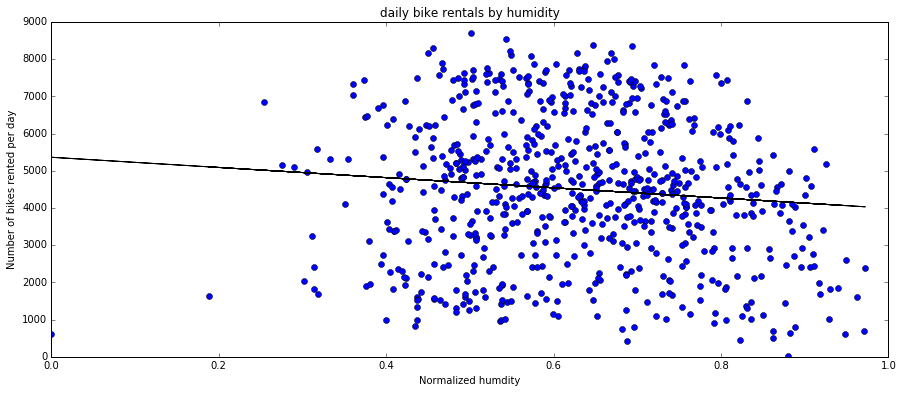

In [61]:
# create linear regressions for each variable
from scipy import stats
# Fit the model
x = df['hum']
y = df['cnt']
slope, intercept, r_value, p_value, slope_std_error = stats.linregress(x, y)

# Calculate some additional outputs
predict_y = intercept + slope * x
pred_error = y - predict_y
degrees_of_freedom = len(x) - 2
residual_std_error = np.sqrt(np.sum(pred_error**2) / degrees_of_freedom)

# Plotting
pylab.plot(x, y, 'o')
pylab.plot(x, predict_y, 'k-')
plt.ylabel('Number of bikes rented per day')
plt.xlabel('Normalized humdity')
plt.title('daily bike rentals by humidity')
plt.ylim(0, 9000)
pylab.show()

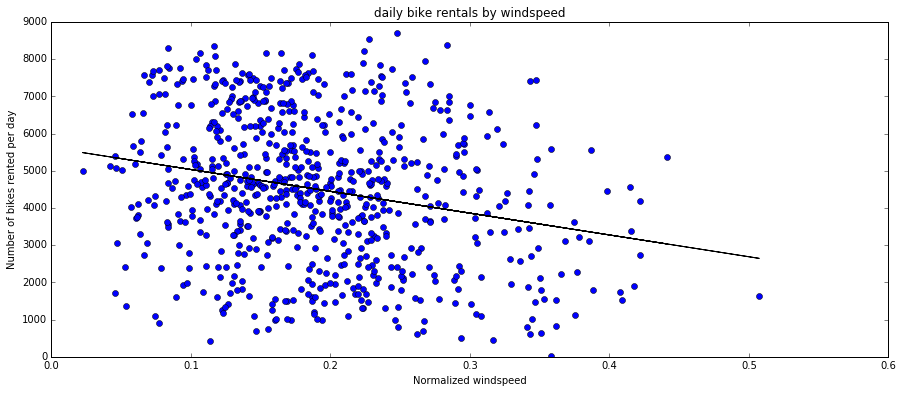

In [62]:
# create linear regressions for each variable
from scipy import stats
# Fit the model
x = df['windspeed']
y = df['cnt']
slope, intercept, r_value, p_value, slope_std_error = stats.linregress(x, y)

# Calculate some additional outputs
predict_y = intercept + slope * x
pred_error = y - predict_y
degrees_of_freedom = len(x) - 2
residual_std_error = np.sqrt(np.sum(pred_error**2) / degrees_of_freedom)

# Plotting
pylab.plot(x, y, 'o')
pylab.plot(x, predict_y, 'k-')
plt.ylabel('Number of bikes rented per day')
plt.xlabel('Normalized windspeed')
plt.title('daily bike rentals by windspeed')
plt.ylim(0, 9000)
pylab.show()

('mean count for hrs: ', [53.89807162534435, 33.375690607734803, 22.869930069930071, 11.727403156384504, 6.3529411764705879, 19.889818688981869, 76.044137931034484, 212.06464924346631, 359.01100412654745, 219.30949105914718, 173.6685006877579, 208.14305364511691, 253.31593406593407, 253.66117969821673, 240.94924554183814, 251.23319615912209, 311.98356164383563, 461.45205479452056, 425.51098901098902, 311.52335164835165, 226.03021978021977, 172.31456043956044, 131.33516483516485, 87.831043956043956])
('std of count for hrs: ', [42.307910034042756, 33.538727066114888, 26.578642451956433, 13.23919026631288, 4.1438183552359034, 13.200764731341136, 55.084347522412379, 161.44193559772296, 235.1892852124484, 93.703457607747637, 102.20541292255062, 127.4955361527288, 145.08113432379105, 148.10765738131172, 147.2715735520282, 144.63254100816775, 148.68261832309963, 232.65661074026946, 224.63930407538146, 161.05035908362819, 119.67016416560742, 89.788893215062458, 69.937781543172321, 50.84688857

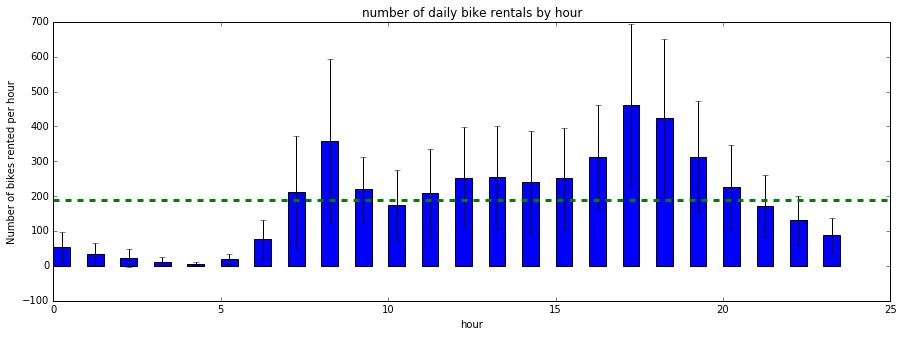

In [70]:
# analyze the data by hour
df_hr = pd.read_csv("/Users/hannahhagen/Documents/Git/data-analysis-bike-share/Question1 Data Set/hour.csv") #Reading the dataset in a dataframe using Pandas
df_hr.describe() #get summary of numerical variables
hr = df_hr.groupby(['hr'])
hr_stats = hr.describe()

mean_cnt_hr = []
std_cnt_hr = []
i = 0
while i<24:
    mean_cnt_hr.append(hr_stats.cnt[i]['mean'])
    std_cnt_hr.append(hr_stats.cnt[i]['std'])
    i+=1
print("mean count for hrs: ",mean_cnt_hr)
print("std of count for hrs: ",std_cnt_hr)

x = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]
plt.figure(figsize=(15, 5))
plt.bar(left=x,height=mean_cnt_hr,width=0.5,yerr=std_cnt_hr,ecolor = 'black',)
# plot an average total count.
cnt_avg = np.mean(df_hr.cnt)
print(cnt_avg)
plt.axhline(y=cnt_avg, ls='dashed', color='g', linewidth=3)
plt.ylabel('Number of bikes rented per hour')
plt.xlabel('hour')
plt.title('number of daily bike rentals by hour')
# takeaways
# sunday and monday have lowest ridership
# thursday and friday max ridership
# wednesday and saturday have largest variability (unpredictability)
# overall the meximum variation between weekdays is: max_cnt - min_cnt / min_cnt
print 'max_variability is', (max(mean_cnt_weekday)-min(mean_cnt_weekday)) / min(mean_cnt_weekday) * 100, "%"